<a href="https://colab.research.google.com/github/fatemehKi/LR_Student_placement/blob/main/sl_i_coding_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Given information about placement data of a batch of students in college campus, predict whether the student will be placed or not.**

Import Libraries 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/amm-ik/ml-datasets/main/module-1/placementData.csv

--2022-07-01 01:17:20--  https://raw.githubusercontent.com/amm-ik/ml-datasets/main/module-1/placementData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19712 (19K) [text/plain]
Saving to: ‘placementData.csv’

placementData.csv   100%[===================>]  19.25K  --.-KB/s    in 0.001s  

2022-07-01 01:17:20 (15.3 MB/s) - ‘placementData.csv’ saved [19712/19712]



Read the file and Observe 

In [ ]:
df = pd.read_csv("placementData.csv")
df.head(20)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [ ]:
df['degree_t'].unique()
# df['hsc_s'].unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

Let's try to explore these features - Both categorical and numerical. 
Check For - 
1. Data types of each features 
2. Missing Values
3. Unique Values
4. Encode categorical features  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Drop columns that are of no use. In our case, we have no use of sl_no 

In [ ]:
df = df.drop(['sl_no'], axis=1)

Can we obtain some insights on the dataset using -
1. Categorical Plots such as (not limited to)

  *   Gender comparison - *(Discussed below)*
  *   Influence of any specialization/school courses in Job
  *   Placement statistics with respect to various features

2. Correlation Matrix/ Heat maps between features 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


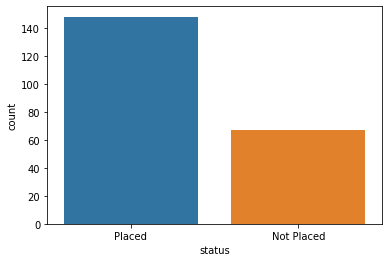

In [ ]:
sns.countplot('status', data=df)

In [ ]:
distribution_df = pd.DataFrame(df.groupby(['gender','status'])['status'].count())
print(distribution_df)

                   status
gender status            
F      Not Placed      28
       Placed          48
M      Not Placed      39
       Placed         100


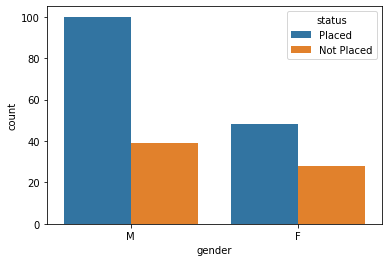

In [ ]:
sns.countplot(x='gender', hue='status', data=df)
# Plotting placement stats by gender 

Text(10.049999999999997, 0.5, 'Degree')

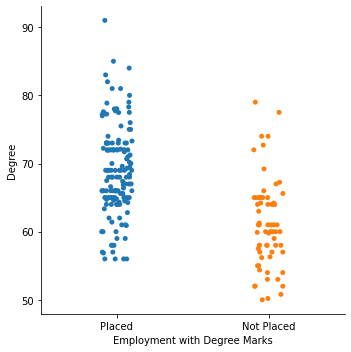

In [ ]:
# Plotting Placement stats by degree percentage 
sns.catplot(y='degree_p', x='status', data=df)
plt.xlabel('Employment with Degree Marks')
plt.ylabel('Degree')

Can you find some more interesting insights through this dataset ? 

In [ ]:
# placement based on area of study
distribution_df = pd.DataFrame(df.groupby(['hsc_s','status'])['status'].count())
print(distribution_df)

                     status
hsc_s    status            
Arts     Not Placed       5
         Placed           6
Commerce Not Placed      34
         Placed          79
Science  Not Placed      28
         Placed          63


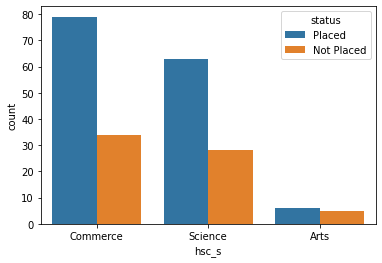

In [ ]:
sns.countplot(x='hsc_s', hue='status', data=df)

**REMINDER**

Do we need any more preprocessing step ? Check if you have -

1.   Encoded all the categorical features 
2.   Collinearity Test 
3.   Normalisation/Standardization of features 
4.   Handled all missing values, noisy inputs.





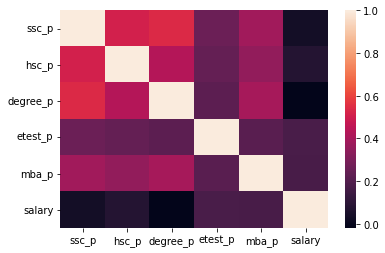

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

In [ ]:
# 1 / (1 - R^2)

def multicollinearity_by_vif(X, vif=5):
    """Remove columns from X whose VIF is greater than supplied 'vif'
    Parameters:
        X:array or dataframe containing data excluding target variable
        vif: int or float of limiting value of VIF
    Note:
        This function changes X inplace
    """
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    # Go through each column
    for i in range(len(X.columns)):

        # View which columns are left
        print(f"Columns remaining at iteration {i}: {X.columns}")

        # Calculate VIF
        l = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        s = pd.Series(index=X.columns, data=l).sort_values(ascending=False)
        
        # If VIF is above our threshold, eliminate the column with the highest VIF
        if s.iloc[0] > vif:
            X.drop(s.index[0],  axis=1, inplace=True)
            print('Removed: ', s.index[0],', VIF: ', s.iloc[0])
        else:
            break

multicollinearity_by_vif(X=df.drop(['status', 'ssc_p', 'ssc_b', 'hsc_p', 'mba_p', 'workex', 'hsc_s', 'gender','hsc_b', 'specialisation', 'degree_t', 'salary'], axis=1))

Columns remaining at iteration 0: Index(['degree_p', 'etest_p'], dtype='object')
Removed:  degree_p , VIF:  28.089688207619993
Columns remaining at iteration 1: Index(['etest_p'], dtype='object')


ValueError: ignored

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


OK, let's split our dataset into train-dev-test  

In [ ]:
#type your code here 

Import your classification model of choice, fit the model on training set 

In [ ]:
#type your code here 

Let's try to measure performance using - 
1. Confusion Matrix 
2. Accuracy 
3. Precision
4. Recall
5. ROC Curve 
6. AUC to Compare the performance of classification algorithms used
7. Precision Recall Curve  

In [ ]:
#type your code here 

How can we check if our model is overfitting on the dataset ? What about outliers, are they affecting our model's performance ? 


In [ ]:
#type your code here